# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
!pip install emnist
# !pip install lightautoml
# !pip install -U lightautoml[cv]

^C
ERROR: Operation cancelled by user


In [65]:
import os
import pickle
import emnist

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
# from lightautoml.dataset.roles import DatetimeRole
# from lightautoml.tasks import Task

import sklearn
print('sklearn version', sklearn.__version__)

sklearn version 1.2.2


### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [3]:
# !rm ~/.cache/emnist/emnist.zip
!cp ./emnist.zip ~/.cache/emnist/emnist.zip

In [4]:
!ls ~/.cache/emnist/

emnist.zip


In [5]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')
print(f'Train: {images_train.shape[0]} samples')
print(f'Test: {images_test.shape[0]} samples')
print(f'Image size: {images_train.shape[1:]}')

Train: 112800 samples
Test: 18800 samples
Image size: (28, 28)


In [ ]:
mapping = pd.read_csv('./emnist-balanced-mapping.txt', sep=' ', names=['label', 'code'])
mapping['char'] = mapping['code'].apply(chr)
mapping.set_index('label', inplace=True)
pd.set_option('display.max_columns', None)
mapping.T

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
code,48,49,50,51,52,53,54,55,56,57,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,97,98,100,101,102,103,104,110,113,114,116
char,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,d,e,f,g,h,n,q,r,t


In [7]:
def lab2chr(label):
    return mapping.loc[label]['char']

lab2chr(10)

'A'

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [36]:
X_train = images_train.reshape((
    images_train.shape[0],
    images_train.shape[1] * images_train.shape[2]
))
y_train = labels_train

X_test = images_test.reshape((
    images_test.shape[0],
    images_test.shape[1] * images_test.shape[2]
))
y_test = labels_test

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [53]:
clf = DecisionTreeClassifier(random_state=42)  
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.5916489361702127


In [56]:
cross_score = cross_val_score(clf, X_test, y_test).mean()
print(f'Mean cross val score: {cross_score}')

Mean cross val score: 0.4622340425531915


#### RandomForestClassifier

In [58]:
X_train.shape

(112800, 784)

In [23]:
clf = RandomForestClassifier(random_state=42)  
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = clf.predict(X_test)

In [44]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8115425531914894


In [45]:
cross_score = cross_val_score(clf, X_test, y_test).mean()
print(f'Mean cross val score: {cross_score}')

Mean cross val score: 0.7421276595744681


In [47]:
lab2chr_np = np.vectorize(lab2chr)

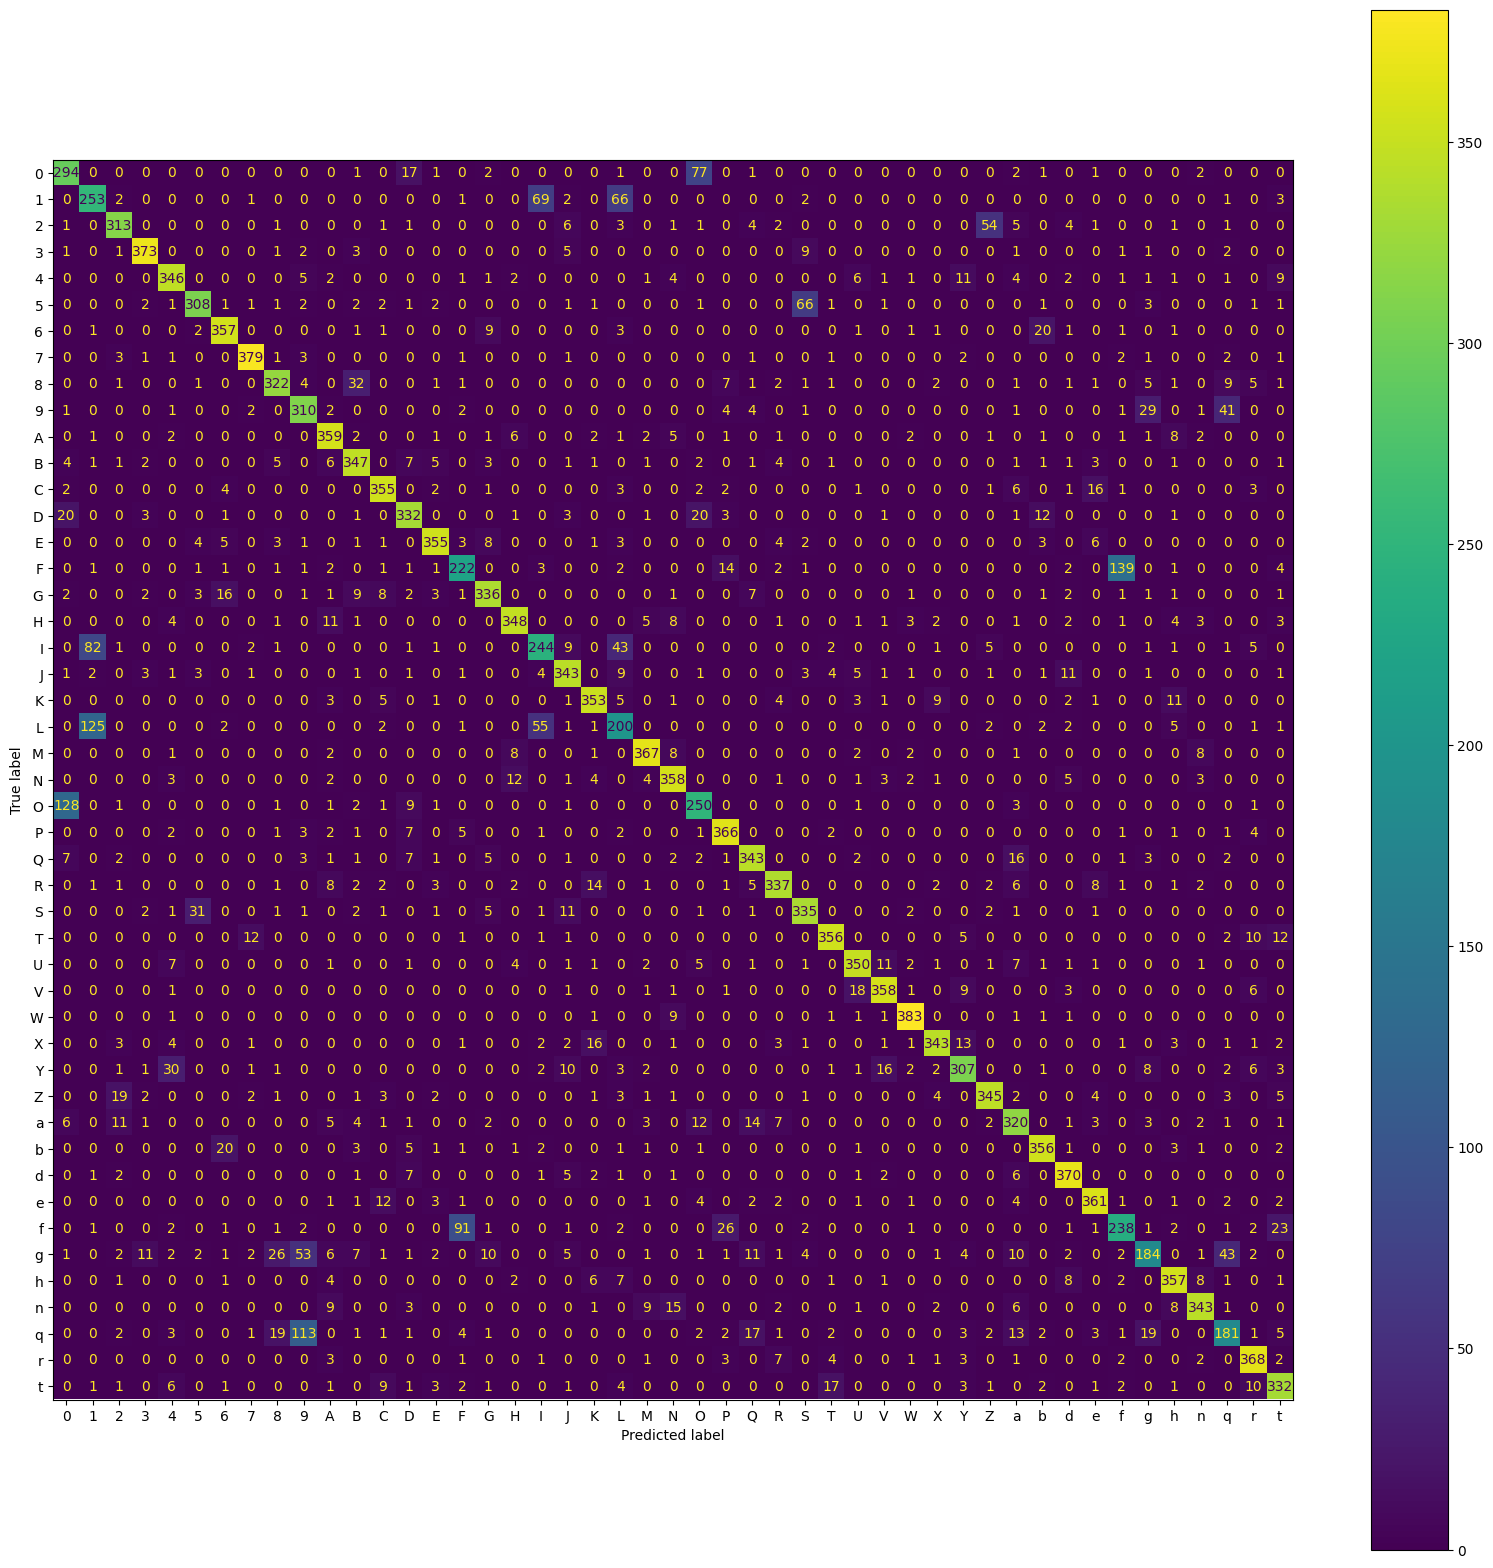

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(lab2chr_np(y_test), lab2chr_np(y_pred), ax=ax)

In [49]:
cf = confusion_matrix(lab2chr_np(y_test), lab2chr_np(y_pred))
cf

array([[294,   0,   0, ...,   0,   0,   0],
       [  0, 253,   2, ...,   1,   0,   3],
       [  1,   0, 313, ...,   1,   0,   0],
       ...,
       [  0,   0,   2, ..., 181,   1,   5],
       [  0,   0,   0, ...,   0, 368,   2],
       [  0,   1,   1, ...,   0,  10, 332]])

In [50]:
cf_df = pd.DataFrame(
    data=cf,
    columns=mapping['char'].rename('pred'),
    index=mapping['char'].rename('true')
)

cf_df_flat = cf_df.stack()
cf_df_flat = cf_df_flat[cf_df_flat.index.map(lambda x: x[0] != x[1])]
cf_df_flat = cf_df_flat.sort_values(ascending=False)

print("Топ 25 символов, которые путает классификатор:")
cf_df_flat.head(25)

Топ 25 символов, которые путает классификатор:


true  pred
F     f       139
O     0       128
L     1       125
q     9       113
f     F        91
I     1        82
0     O        77
1     I        69
      L        66
5     S        66
L     I        55
2     Z        54
g     9        53
I     L        43
g     q        43
9     q        41
8     B        32
S     5        31
Y     4        30
9     g        29
g     8        26
f     P        26
      t        23
b     6        20
6     b        20
dtype: int64

In [51]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(clf, f)

### Тест

In [70]:
!pip install uvicorn fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.6 MB/s eta 0:00:00


In [76]:
cf_df_flat.tail(25)

true  pred
I     W       0
J     R       0
      Q       0
      P       0
      N       0
      M       0
      K       0
      H       0
      G       0
      E       0
      C       0
      A       0
      9       0
      8       0
      6       0
      2       0
I     t       0
      n       0
      f       0
      e       0
      d       0
      b       0
      a       0
      Y       0
N     O       0
dtype: int64

In [77]:
!uvicorn myapp.main:app

INFO:     Started server process [56296]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:47448 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:35054 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:47450 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:56564 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:56564 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:43044 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:43044 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:43060 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:43044 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:43044 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:59838 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:58012 - "POST /api/predict HTTP/1.1" 200 OK
^C
INFO:     Shutting down
INFO:     Waiti

### Docker

#### Сборка образа

```sh
docker build -t numbers .
```

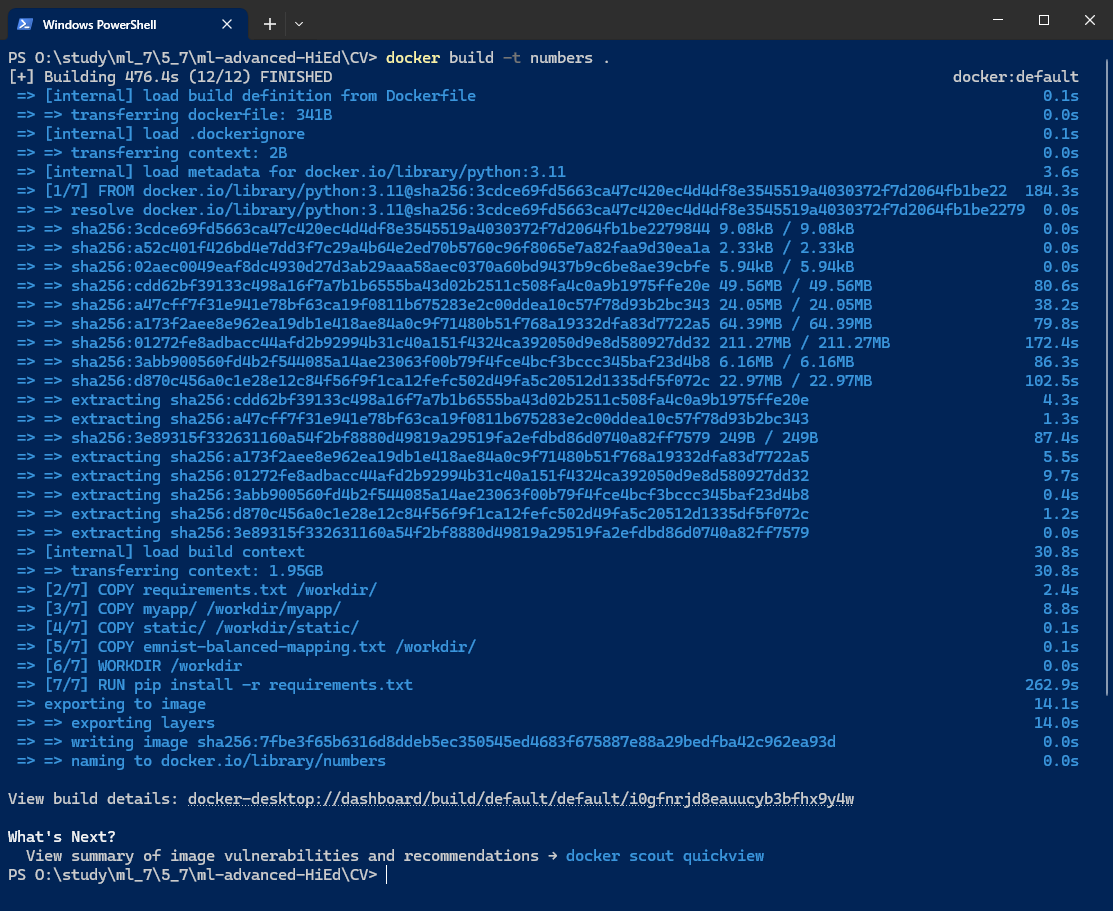

#### Запуск контейнера

```sh
docker run -p 8000:8000 numbers
```

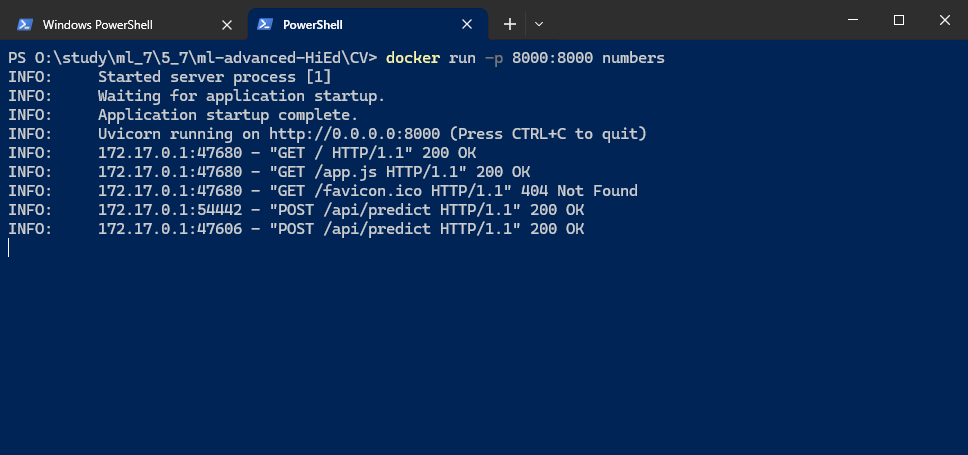

#### Проверка сервиса

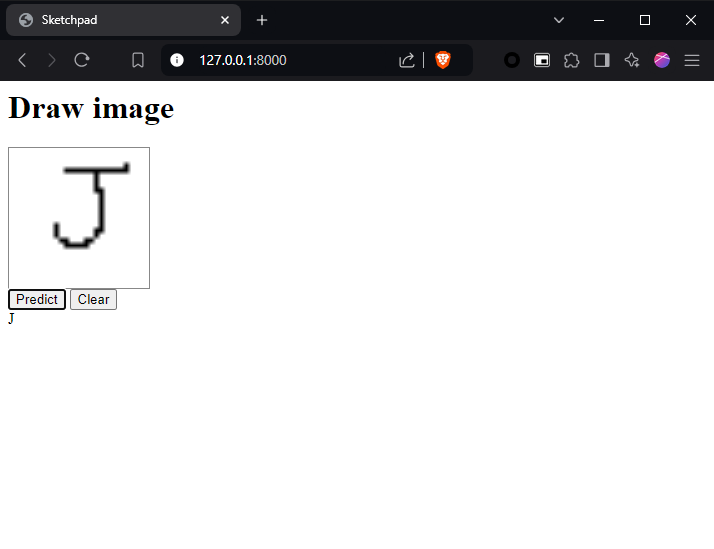